# Setting Up

In [0]:
# import Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
url = "http://bit.ly/FinancialDataset"

finData = pd.read_csv(url)
finData.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# Data Prep

In [4]:
# check shape of dataset
finData.shape

(23524, 13)

In [5]:
# check for duplicates
finData.duplicated()

# display duplicates, if any
duplicatedData = finData[finData.duplicated()]
print(duplicatedData)


Empty DataFrame
Columns: [country, year, uniqueid, Has a Bank account, Type of Location, Cell Phone Access, household_size, Respondent Age, gender_of_respondent, The relathip with head, marital_status, Level of Educuation, Type of Job]
Index: []


In [6]:
# rename columns
finData = finData.rename(columns={
    'Has a Bank account' : 'bank_account',
    'Type of Location' : 'location',
    'Cell Phone Access' : 'cell_phone_access',
    'Respondent Age' : 'respondent_age',
    'gender_of_respondent' : 'respondent_gender',
    'The relathip with head' : 'rship_with_head',
    'Level of Educuation' : 'education_level',
    'Type of Job' : 'job_type'
})

finData.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'respondent_gender', 'rship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [7]:
# ensure the correct data types are assigned
finData.dtypes

country               object
year                   int64
uniqueid              object
bank_account          object
location              object
cell_phone_access     object
household_size       float64
respondent_age       float64
respondent_gender     object
rship_with_head       object
marital_status        object
education_level       object
job_type              object
dtype: object

In [8]:
# check for missing data
print(finData.isnull().sum())

# store rows with empty values
nullValues = finData[finData.isna().any(axis=1)]


country              14
year                  0
uniqueid              0
bank_account         36
location             15
cell_phone_access    11
household_size       28
respondent_age       34
respondent_gender    34
rship_with_head       4
marital_status       32
education_level      29
job_type             30
dtype: int64


In [9]:
# preview the rows containing null values
nullValues

,country,year,uniqueid,bank_account,location,cell_phone_access,household_size,respondent_age,respondent_gender,rship_with_head,marital_status,education_level,job_type
436,Kenya,2018,uniqueid_437,No,Rural,Yes,2.0,NaN,NaN,Head of Household,Widowed,Primary education,Farming and Fishing
437,Kenya,2018,uniqueid_438,No,Rural,Yes,1.0,NaN,NaN,Head of Household,Married/Living together,Primary education,Farming and Fishing
438,Kenya,2018,uniqueid_439,Yes,Urban,Yes,2.0,NaN,NaN,Head of Household,Married/Living together,Primary education,Formally employed Government
439,Kenya,2018,uniqueid_440,No,Rural,Yes,10.0,NaN,NaN,Spouse,Married/Living together,Primary education,Farming and Fishing
7281,Rwanda,2016,uniqueid_1214,No,Rural,Yes,4.0,NaN,Male,Head of Household,Married/Living together,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23514,Uganda,2018,uniqueid_2107,No,Urban,Yes,NaN,24.0,Female,Spouse,Married/Living together,Primary education,Self employed
23515,Uganda,2018,uniqueid_2108,No,Rural,No,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23516,Uganda,2018,uniqueid_2109,No,Urban,Yes,NaN,35.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23517,Uganda,2018,uniqueid_2110,No,Urban,Yes,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income


In [0]:
# create Kenyan Dataset and save to CSV
finKE = finData.loc[finData['country'] == 'Kenya']
finKE.to_csv('finKE.csv', index=False)

In [0]:
# create Tanzanian Dataset and save to CSV
finTZ = finData.loc[finData['country'] == 'Tanzania']
finTZ.to_csv('finTZ.csv', index=False)

In [0]:
# create Ugandan Dataset and save to CSV
finUG = finData.loc[finData['country'] == 'Uganda']
finUG.to_csv('finUG.csv', index=False)

In [0]:
# create Rwandan Dataset and save to CSV
finRW = finData.loc[finData['country'] == 'Rwanda']
finRW.to_csv('finRW.csv', index=False)

# RESEARCH QUESTION

The research problem is to figure out how we can ***predict which individuals are most likely to have or use a bank account.*** Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

Text(0.5, 1.0, 'Number of Females vs Males')

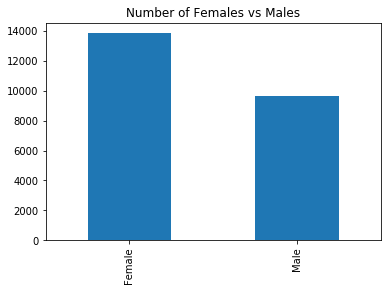

In [40]:
# compare number of males to number of females
finData.respondent_gender.value_counts().plot(kind='bar')
plt.title("Number of Females vs Males")

Text(0.5, 1.0, 'Rural vs Urban - Kenya')

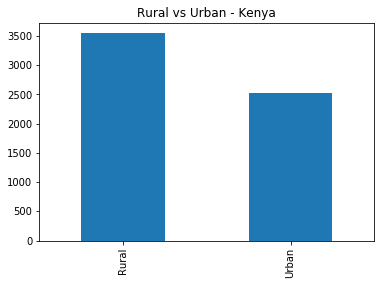

In [46]:
# finding which is more between rural and urban
finKE.location.value_counts().plot(kind='bar')
plt.title('Rural vs Urban - Kenya')

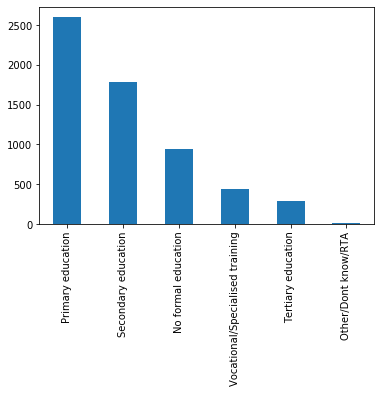

In [44]:
# find level of education per country
finKE.education_level.value_counts().plot(kind='bar')


In [29]:
finKE

,country,year,uniqueid,bank_account,location,cell_phone_access,household_size,respondent_age,respondent_gender,rship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,Kenya,2018,uniqueid_6067,No,Rural,Yes,4.0,26.0,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
6064,Kenya,2018,uniqueid_6068,No,Urban,No,5.0,17.0,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
6065,Kenya,2018,uniqueid_6069,No,Rural,Yes,9.0,30.0,Female,Spouse,Married/Living together,No formal education,Farming and Fishing
6066,Kenya,2018,uniqueid_6070,No,Rural,Yes,3.0,52.0,Male,Head of Household,Married/Living together,Primary education,Self employed


In [63]:
# how is cell phone access affected by location?

# cell_phone_access is Yes
cellYes = finData.loc[finData['cell_phone_access'] == 'Yes']
# cell_phone_access is No
cellNo = finData.loc[finData['cell_phone_access'] == 'No']

# cell_phone_access is Yes while location is Rural
cellYesRural = cellYes.loc[cellYes['location'] == 'Rural']

# cell_phone_access is No while location is Rural
cellNoRural = cellNo.loc[cellNo['location'] == 'Rural']

# cell_phone_access is Yes while location is Urban
cellYesUrban = cellYes.loc[cellYes['location'] == 'Urban']

# cell_phone_access is No while location is Rural
cellNoUrban = cellNo.loc[cellNo['location'] == 'Urban']

print("There are", len(cellYes), "people with cell phone access.")
print("Of that", len(cellYes), ",", len(cellYesRural), "are in rural areas while", len(cellYesUrban), "are in urban areas.")

print("There are", len(cellNo), "people without cell phone access.")
print("Of that", len(cellNo), ",", len(cellNoRural), "are in rural areas while", len(cellNoUrban), "are in urban areas.")

There are 17449 people with cell phone access.
Of that 17449 , 11065 are in rural areas while 6381 are in urban areas.
There are 6064 people without cell phone access.
Of that 6064 , 3273 are in rural areas while 2790 are in urban areas.


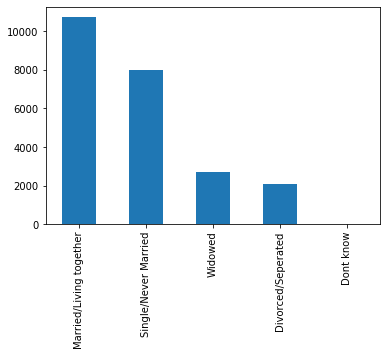

In [54]:
# find out the distribution per marital status
finData.marital_status.value_counts().plot(kind='bar')

In [0]:
# using bivariate analysis, look at whether location affects
# whether one has a bank account


<BarContainer object of 23524 artists>

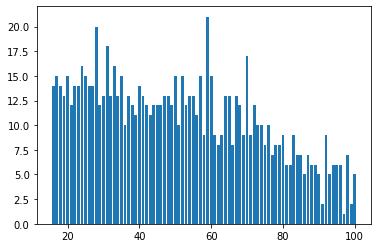

In [51]:
# does age have any relation to household size?
#finData.plot(x='respondent_age', y='household_size', kind='scatter')
plt.bar(finData['respondent_age'], finData['household_size'])

In [0]:
#create a grouped bar chart to show the number of rural vs urban members per country

# set bar width
barWidth = 0.25 

# set height of bars
KeRu = finKE.loc[finKE['location'] == 'Rural']
KeUr = finKE.loc[finKE['location'] == 'Urban']
UgRu = finUG.loc[finUG['location'] == 'Rural']
UgUr = finUG.loc[finUG['location'] == 'Urban']
RwRu = finRW.loc[finRW['location'] == 'Rural']
RwUr = finRW.loc[finRW['location'] == 'Urban']
TzRu = finTZ.loc[finTZ['location'] == 'Rural']
TzUr = finTZ.loc[finTZ['location'] == 'Urban']




In [34]:

# 
# Set position of bar on X axis
p1 = np.arange(len(KeRu))
p2 = [x + barWidth for x in 1]
r3 = [x + barWidth for x in r2]


plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')


2525